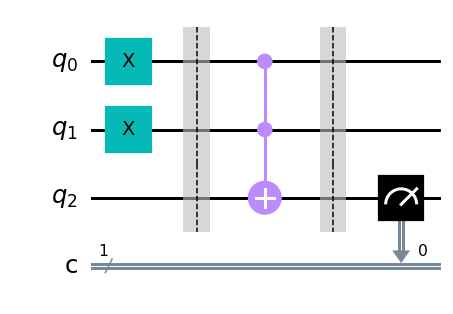

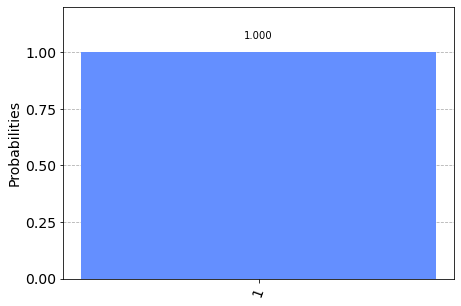

In [3]:
# boolean_gates.ipynb

# Cell 1 - Boolean AND Gate

import matplotlib.pyplot as plt
import numpy as np
import qiskit
from IPython.display import Math
from qiskit import Aer, QuantumCircuit, assemble, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import (
    array_to_latex,
    plot_bloch_multivector,
    plot_histogram,
    plot_state_qsphere,
)

backend = Aer.get_backend("aer_simulator")
qc = QuantumCircuit(3, 1) #3 qubits. One of them, the ancilla bit, is for reversibility. 
#1 classical bit

qc.x(0) #apply x gate to qubit zero
qc.x(1) 
qc.barrier() #allows quantum computer to pause and stabilize

qc.ccx(0, 1, 2) #NOT on qubit 2, controlled by qubits 1 and 2
qc.barrier()

qc.measure(2, 0) #measure qubit 2

result = execute(qc, backend, shots=1).result()
counts = result.get_counts()

display(qc.draw(output="mpl", scale=1.5))
plot_histogram(counts)

In [ ]:
# Cell 2 - Boolean OR Gate

backend = Aer.get_backend("aer_simulator")
qc = QuantumCircuit(3, 1)

# qc.x(0)
# qc.x(1)

qc.barrier()

qc.x(0)
qc.x(1)
qc.x(2)

qc.ccx(0, 1, 2)

qc.x(0)
qc.x(1)

qc.barrier()

qc.measure(2, 0)

result = execute(qc, backend, shots=1).result()
counts = result.get_counts()

display(qc.draw(output="mpl", scale=1.5))
plot_histogram(counts)

In [ ]:
# Cell 3 - Feynman's Full Adder (1985)

backend = Aer.get_backend("aer_simulator")
qc = QuantumCircuit(4) #initialize four qubits in the zero state

qc.ccx(0, 1, 3)
qc.cx(0, 1)
qc.ccx(1, 2, 3)
qc.cx(1, 2)
qc.measure_all() #measure all qubits at the end

display(qc.draw(output="mpl", scale=1.5))

In [ ]:
# Cell 4 - Generate truth table for Feynman's Full Adder


def full_carry(a, b, c_in):
    backend = Aer.get_backend("aer_simulator")
    qc = QuantumCircuit(4)

    # Initialize input bit to one if necessary
    if a == 1: #NOT on qubit zero if intialized to zero
        qc.x(0)
    if b == 1:
        qc.x(1)
    if c_in == 1:
        qc.x(2)

    qc.ccx(0, 1, 3) #implements CNOTs and CCNOTs according to circuit order
    qc.cx(0, 1) 
    qc.ccx(1, 2, 3)
    qc.cx(1, 2)
    qc.measure_all()

    qc.save_statevector()
    result = execute(qc, backend, shots=1).result()
    final_state = result.get_statevector()
    counts = result.get_counts()
    return counts #function returns the measurement counts


print("|c_in| b | a |  |c_out| s |") #print out the truth table of the circuit
print("|----|---|---|  |-----|---|")

for c_in in [0, 1]: #prints all outputs for input permutations of full_carry
    for b in [0, 1]:
        for a in [0, 1]:
            c_out, s = list(full_carry(a, b, c_in))[0][:2]
            print(f"|  {c_in} | {b} | {a} |  |  {c_out}  | {s} |")